# The Acoustic Theory of Speech Production
Based on Chs. 1 & 2 of Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---

## Programming Environment

In [84]:
import numpy                    as np
np.set_printoptions(suppress=True) # suppress scientific notation
import numpy.random             as npr
import pandas                   as pd

import matplotlib               as mpl
import matplotlib.pyplot        as plt
plt.rcParams['text.usetex']=True
plt.style.use('ggplot');

from   html.entities import codepoint2name
import math
import string
import unicodedata

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'           :<{pad}}: { np.__version__}")
print(f"{'Pandas'          :<{pad}}: { pd.__version__}")

EXECUTED            : 2023-05-17 23:07:03.790888

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
Pandas              : 1.5.3


In [2]:
def nth_harmonic (n, T):
    """
    Parameters
    ==========
    n: nth harmonic
    T: the period of the fundamental frequency [s]
    """
    return np.round(n/T, 2)

---

## Basic Acoustics: The Physics of Waves
Based on Ch. 1 of Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---

### Acoustic Waveform

An acoustic waveform represents sound-producing pressure fluctuations (i.e., amplitude) as a function of time.

### Simple Periodic Waves

Sine waves are produced by simple harmonic motion (e.g., the swinging of a pendulum).

Three properties are required to define a sine wave are
1. frequency (period)
2. amplitude
3. phase

#### Frequency and Period

Frequency $f$ is the number of times the sinusoidal pattern repeats per unit time; each repetition of the pattern is called a cycle; and the duration of one cycle is its period $T$; thus, frequency $f$ is expressed as cycles per second--or Hertz.

$
\begin{aligned}
f
=\frac{1}{T}
\,\,\,\text{s}^{-1}
=\frac{1}{T}
\,\,\,\text{Hz}
\iff
T
=\frac{1}{f}
\,\,\,\text{s}
\end{aligned}
$

Frequency $f$ and Period $T$ are inversely proportional.

$
f\to\infty
\,\,\,\text{as}\,\,\,
T\to0
\,\,\,\text{and}\,\,\,
T\to\infty
\,\,\,\text{as}\,\,\,
f\to0
$

[EXAMPLE]

If a sine wave has a period $T=0.01\,\,\,\text{s}$, then what is its frequency $f$ in $\text{Hz}$?

In [3]:
T=0.01
f=1/T
f

100.0

#### Amplitude

Amplitude in an acoustic context is the peak deviation of a pressure fluctuation from the normal atmospheric pressure.

In a sound pressure waveform the amplitude of the wave is represented on the vertical axis.

#### Phase

Phase is the timing of the waveform relative to some reference point.

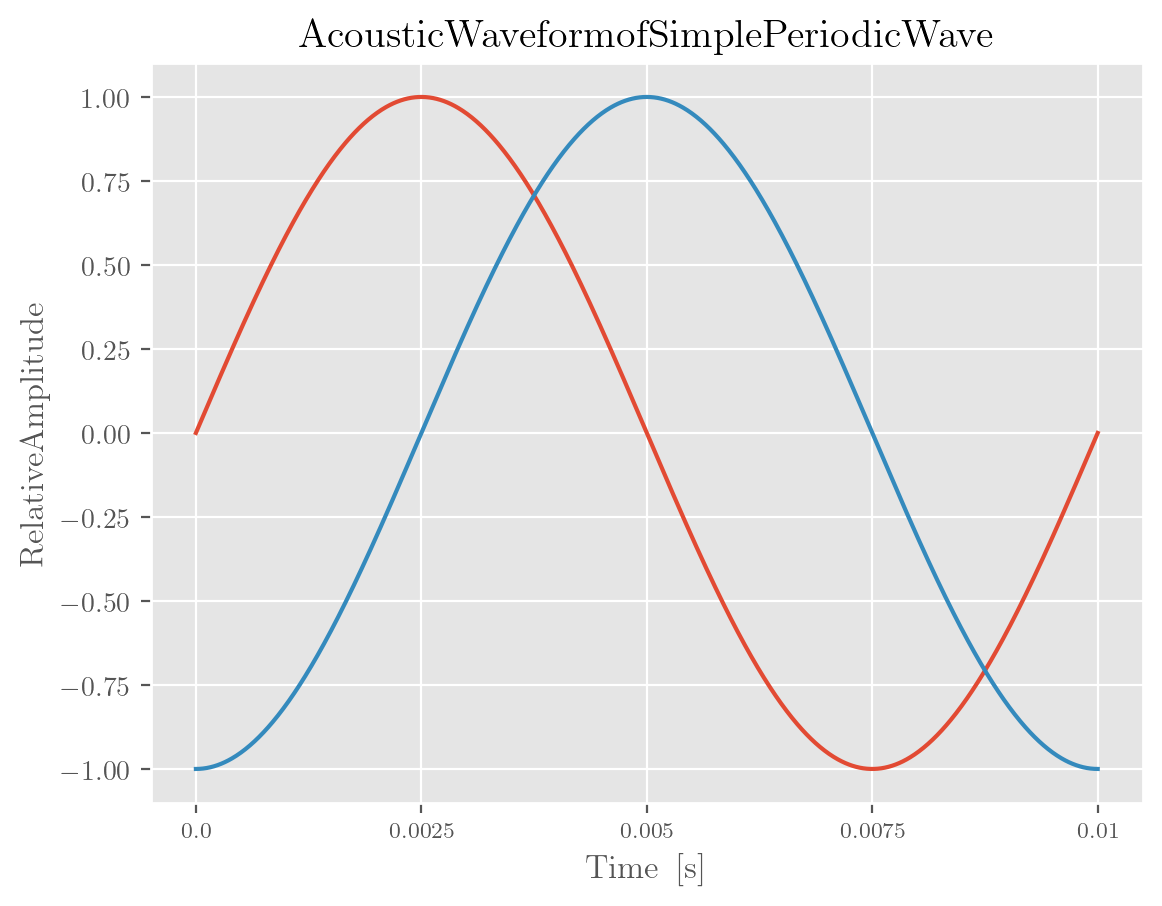

In [135]:
x=np.linspace(0,0.01,1001)

A=1   # amplitude
f=1e2 # frequency
p=0   # phase
y=A*np.sin(2*np.pi*f*x+p)

A2=1        # amplitude
f=1e2       # frequency
p2=-np.pi/2 # phase
y2=A2*np.sin(2*np.pi*f*x+p2)

fig=plt.figure(dpi=200);
ax =plt.subplot();
#ax.set_aspect(1);

ax.plot(x,y);
ax.plot(x,y2);

n=4
ax.set_xticks(ticks =[i*0.01/n for i in range(n+1)],
              labels=[f'${i*0.01/n}$' for i in range(n+1)],
              fontsize=8);
ax.set_xlabel(r'$\mathrm{Time}\,\,\,\mathrm{[s]}$');
ax.set_ylabel(r'$\mathrm{Relative Amplitude}$');
ax.set_title(r'$\mathrm{Acoustic Waveform of Simple Periodic Wave}$');

---

### Complex Periodic Waves

Complex periodic waves are composed of at least two sine waves.

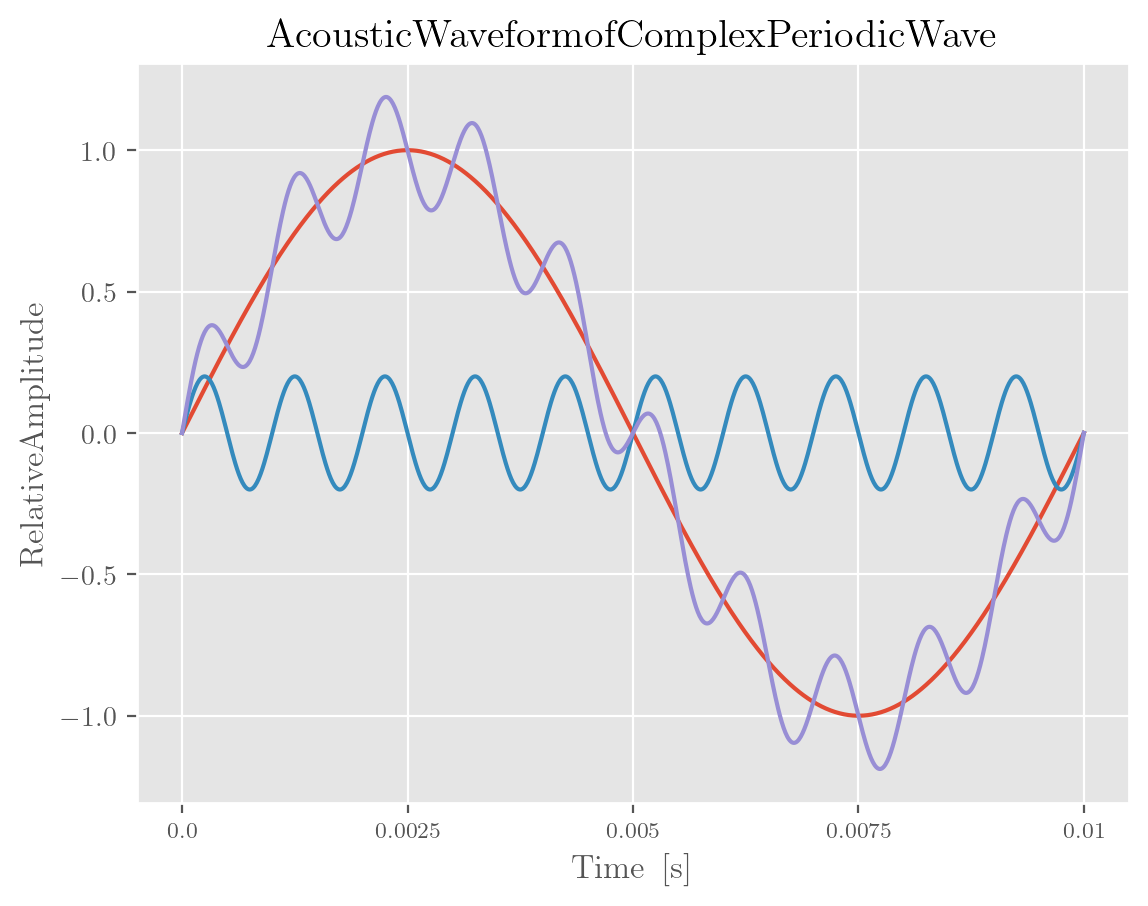

In [116]:
x=np.linspace(0,0.01,1001)

A1=1   # amplitude
f1=1e2 # frequency
y1=A1*np.sin(2*np.pi*f1*x)

A2=0.2 # amplitude
f2=1e3 # frequency
y2=A2*np.sin(2*np.pi*f2*x)

fig=plt.figure(dpi=200);
ax =plt.subplot();
#ax.set_aspect(1);

ax.plot(x,y1);
ax.plot(x,y2);
ax.plot(x,y1+y2);

n=4
ax.set_xticks(ticks =[i*0.01/n for i in range(n+1)],
              labels=[f'${i*0.01/n}$' for i in range(n+1)],
              fontsize=8);
ax.set_xlabel(r'$\mathrm{Time}\,\,\,\mathrm{[s]}$');
ax.set_ylabel(r'$\mathrm{Relative Amplitude}$');
ax.set_title(r'$\mathrm{Acoustic Waveform of Complex Periodic Wave}$');

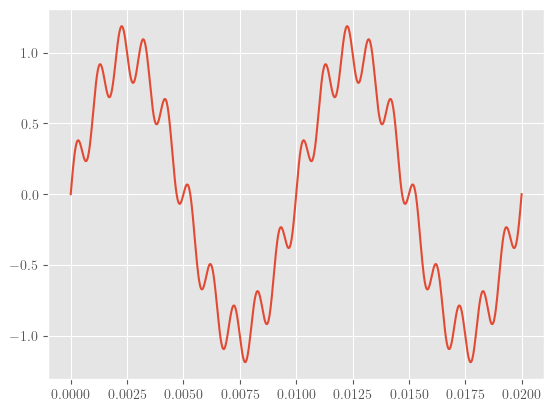

In [72]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.2
f2 = 1e3
y2 = A2 * np.sin(2 * np.pi * f2 * t)

plt.plot(t, y1 + y2);

### Fundamental Frequency

The frequency of a complex periodic wave is called the fundamental frequency $F_0$.

The fundamental frequency of a complex periodic wave is the greatest common denominator of the frequencies of the component sine waves.

[EXAMPLE]

What's the fundamental frequency of a complex wave whose components have frequencies of

$100\,\,\,\text{Hz}$ and $1000\,\,\,\text{Hz}$

$400\,\,\,\text{Hz}$ and $500\,\,\,\text{Hz}$

In [85]:
math.gcd(100,1000)

100

In [86]:
math.gcd(400,500)

100

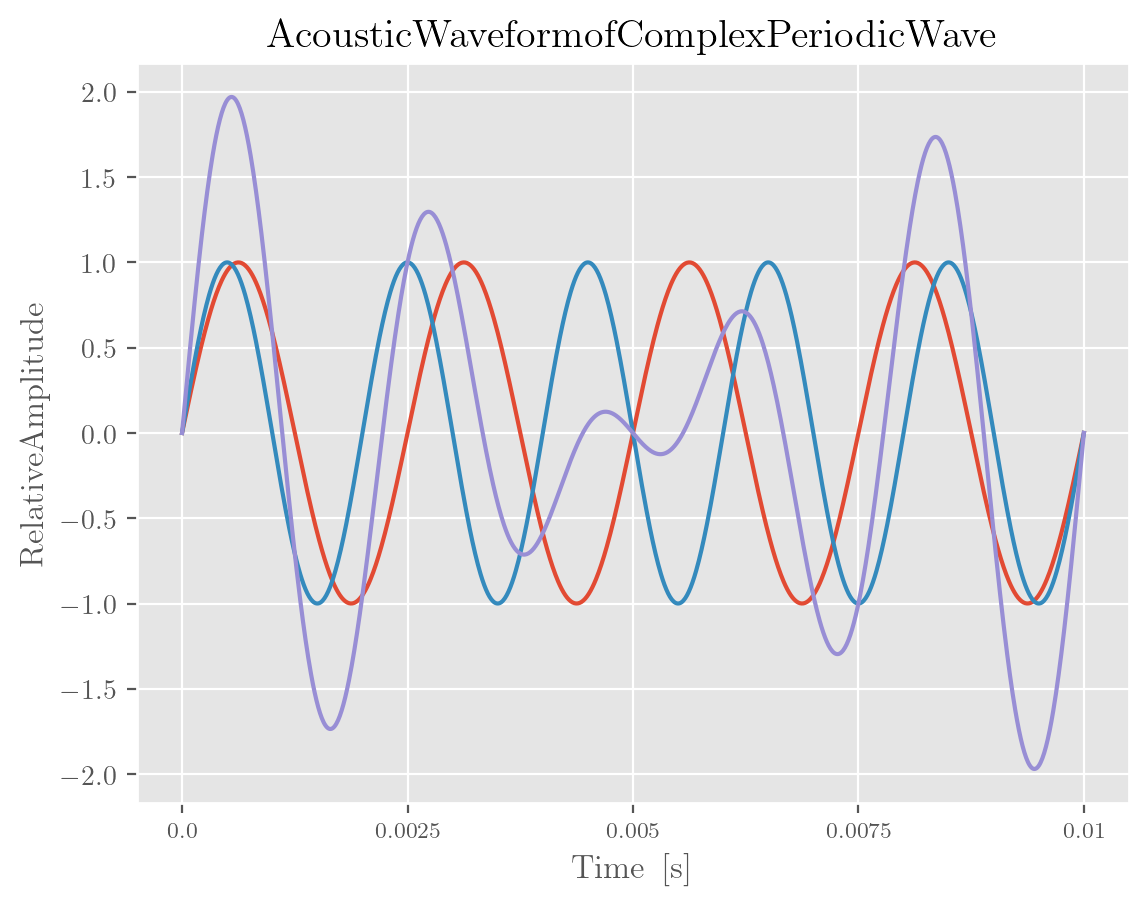

In [114]:
x=np.linspace(0,0.01,1001)

A1=1   # amplitude
f1=4e2 # frequency
y1=A1*np.sin(2*np.pi*f1*x)

A2=1   # amplitude
f2=5e2 # frequency
y2=A2*np.sin(2*np.pi*f2*x)

fig=plt.figure(dpi=200);
ax =plt.subplot();
#ax.set_aspect(1);

ax.plot(x,y1);
ax.plot(x,y2);
ax.plot(x,y1+y2);

n=4
ax.set_xticks(ticks =[i*0.01/n for i in range(n+1)],
              labels=[f'${i*0.01/n}$' for i in range(n+1)],
              fontsize=8);
ax.set_xlabel(r'$\mathrm{Time}\,\,\,\mathrm{[s]}$');
ax.set_ylabel(r'$\mathrm{Relative Amplitude}$');
ax.set_title(r'$\mathrm{Acoustic Waveform of Complex Periodic Wave}$');

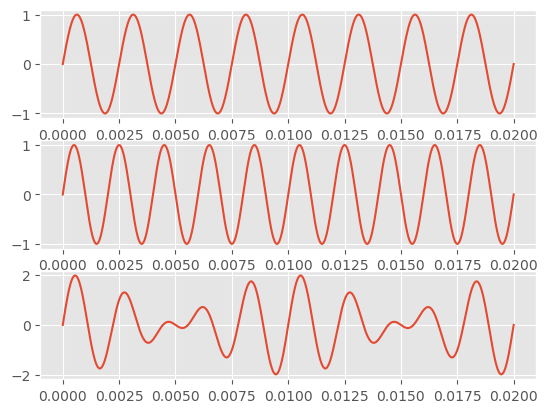

In [12]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 4e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 1
f2 = 5e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

fig, ax = plt.subplots(3);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y1 + y2);

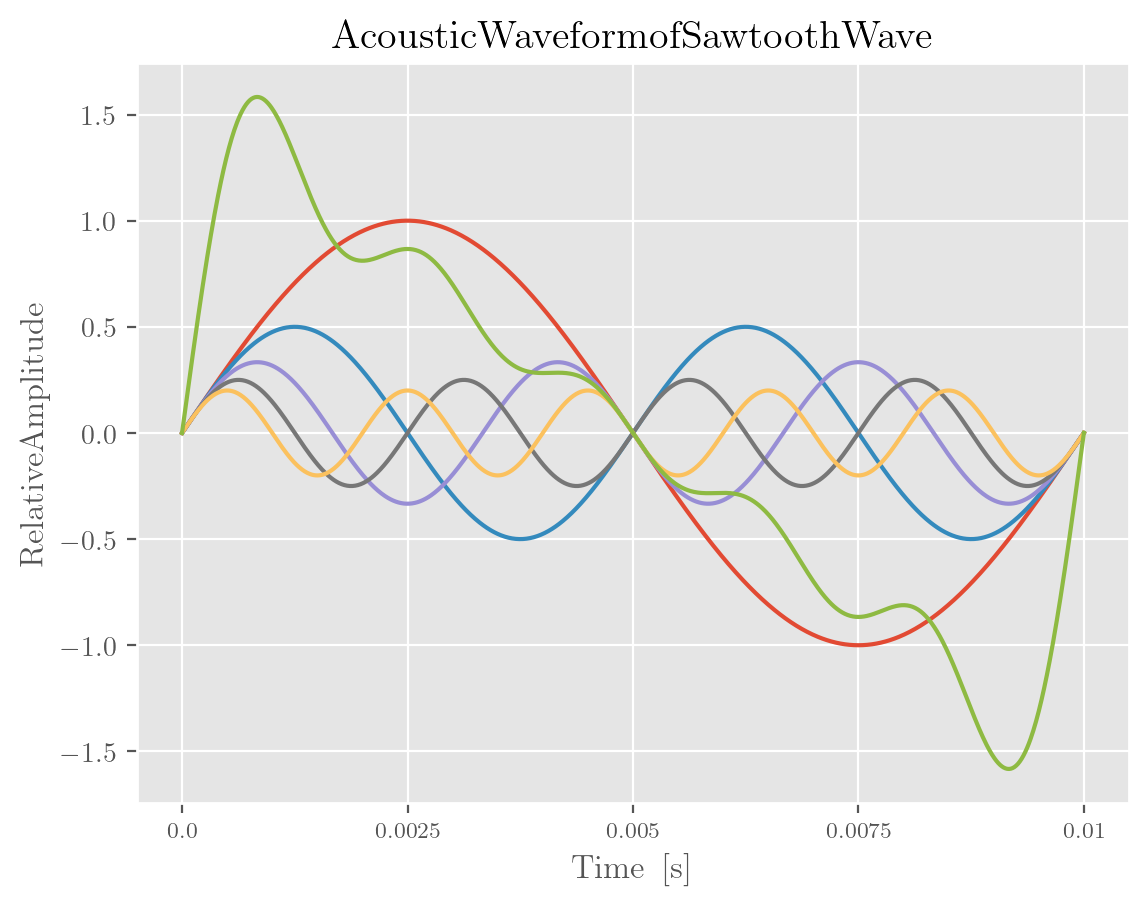

In [110]:
x=np.linspace(0,0.01,1001)

A1=1   # amplitude
f1=1e2 # frequency
y1=A1*np.sin(2*np.pi*f1*x)

A2=A1/2# amplitude
f2=2e2 # frequency
y2=A2*np.sin(2*np.pi*f2*x)

A3=A1/3# amplitude
f3=3e2 # frequency
y3=A3*np.sin(2*np.pi*f3*x)

A4=A1/4# amplitude
f4=4e2 # frequency
y4=A4*np.sin(2*np.pi*f4*x)

A5=A1/5# amplitude
f5=5e2 # frequency
y5=A5*np.sin(2*np.pi*f5*x)

fig=plt.figure(dpi=200);
ax =plt.subplot();
#ax.set_aspect(1);

ax.plot(x,y1);
ax.plot(x,y2);
ax.plot(x,y3);
ax.plot(x,y4);
ax.plot(x,y5);
ax.plot(x,y1+y2+y3+y4+y5);

n=4
ax.set_xticks(ticks =[i*0.01/n for i in range(n+1)],
              labels=[f'${i*0.01/n}$' for i in range(n+1)],
              fontsize=8);
ax.set_xlabel(r'$\mathrm{Time}\,\,\,\mathrm{[s]}$');
ax.set_ylabel(r'$\mathrm{Relative Amplitude}$');
ax.set_title(r'$\mathrm{Acoustic Waveform of Sawtooth Wave}$');

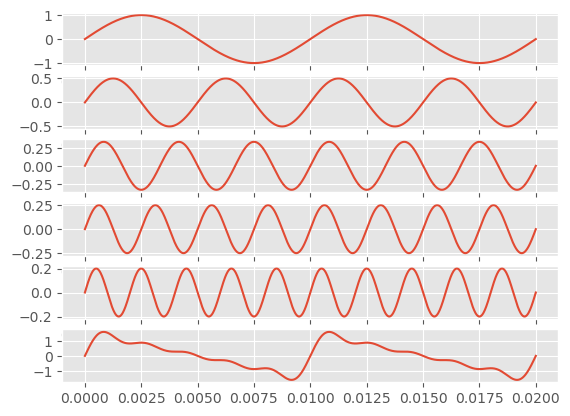

In [13]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.5
f2 = 2e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

A3 = 0.33
f3 = 3e2
y3 = A3 * np.sin(2 * np.pi * f3 * t)

A4 = 0.25
f4 = 4e2
y4 = A4 * np.sin(2 * np.pi * f4 * t)

A5 = 0.2
f5 = 5e2
y5 = A5 * np.sin(2 * np.pi * f5 * t)

fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

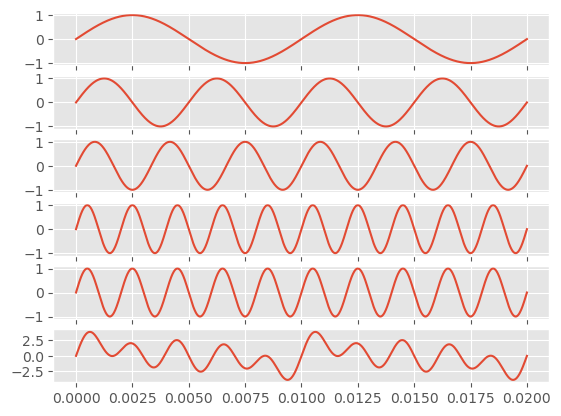

In [14]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
f2 = 2e2
f3 = 3e2
f4 = 4e2
f5 = 5e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)
y2 = A1 * np.sin(2 * np.pi * f2 * t)
y3 = A1 * np.sin(2 * np.pi * f3 * t)
y4 = A1 * np.sin(2 * np.pi * f5 * t)
y5 = A1 * np.sin(2 * np.pi * f5 * t)
fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

### Power Spectrum

amplitude over frequency<br>
the first, lowest-frequency peak is the fundamental frequency of a complex periodic waveform<br>
the remaining, higher-frequency peaks are harmonics (positive integral multiples) of the fundamental frequency<br>

### Fourier Analysis

Fourier analysis of a waveform produces a power spectrum of the waveform.

### Physics of Waves

#### Speed of Sound

Speed of Sound $c$ in moist, warm air

$c=35,000\,\,\,\text{cm s}^{-1}$

#### Wavelength

Wavelength $\lambda$

$
\begin{aligned}
\lambda
=cT
=\frac{c}{f}
\,\,\,\text{cm}
\end{aligned}
$

---

## Acoustic Theory of Speech Production
Based on Ch. 2 of Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---

### Source-Filter Theory of Speech Production

SOURCE
* vocal fold vibration produces a complex periodic wave as the vocal folds are repeatedly opened by subglottal pressure and slap shut by the elastic tension of the vocalis muscle
* vocal fold vibration produces sound the way a siren does, by modulating an airstream

FILTER
* the vocal tract is an acoustic filter that modifies the sound made by the vocal folds

the components of the voicing spectrum are called harmonics<br>
the amplitude of each harmonic above the second is a little less than the one just below it in frequency<br>
the relative amplitudes of the first and second harmonics are related to phonation type; breathy voicing tends to have a louder first harmonic and softer second harmonic, while in creaky voicing the second harmonic is louder than the first<br>

---

### Quantal Theory of Speech Acoustics

__Quantal Theory of Speech Acoustics__<br>



Source-Filter Theory
* complex wave with many components, not just a pure sound
* the vocal folds are the source, they produce sound waves
* everything above the glottis is the filter
* we need the filter to distinguish pure vowel sounds (changing the shape of the tongue and other parts of the "filter")

aperiodic
* because white noise or so quick

periodic
* nasal consonants
* voiced fricatives have a periodic component to them

the pitch and the harmonics denote the fundamental frequency

how to change the pitch? muscles pull on the vocal folds, change the length: control the source

---

Fundamental Frequency $F_0$ (First Harmonic $H_1$)
* the frequency of a complex periodic waveform
* the first, lowest-frequency peak in the power spectrum of a complex periodic waveform
* in acoustic phonetics, $F_0$ is related to the listener's perception of the pitch of the voice

$(N-1)$-th Formant $F_{N-1}$ ($N$-th Harmonic $H_N$)
* positive integral multples of $F_0$

In [ ]:
# if T = 6.6 ms
T = 6.6e-3
f = 1/T
f
print(nth_harmonic(1, T))
print(nth_harmonic(2, T))
print(nth_harmonic(10, T))

151.52
303.03
1515.15


Resonant Frequencies of a tube of length $L$ closed at both ends

$
\begin{aligned}
f_n
&=\frac{nc}{2L}
\end{aligned}
$

Resonant Frequencies of a tube of length $L$ closed at one end and open at the other end

$
\begin{aligned}
F_n
&=\frac{(2n-1)c}{4(L+0.4d)}
\end{aligned}
$

where $d$ is the diameter of the open end of the tube.

---

### Modeling Schwa

---

## Figures

* [[W](https://en.wikipedia.org/wiki/Joseph_Fourier)] Fourier, Joseph (1768-1830)

* [[W](https://en.wikipedia.org/wiki/Harry_Nyquist)] Nyquist, Harry (1889-1976)
* [[W](https://en.wikipedia.org/wiki/Hermann_von_Helmholtz)] Von Helmholtz, Hermann (1821-1894)

---

## Terms

* [W] Acoustic Filter
* [W] Acoustic Medium
* [[W](https://en.wikipedia.org/wiki/Sound_pressure)] Acoustic Pressure (Sound Pressure)
* [[W](https://en.wikipedia.org/wiki/Acoustic_wave)] Acoustic Wave
* [W] Acoustic Waveform
* [[W](https://en.wikipedia.org/wiki/Amplitude)] Amplitude
* [W] Aperiodic Sound
* [[W](https://en.wikipedia.org/wiki/Atmospheric_pressure)] Atmospheric Pressure
* [[W](https://en.wikipedia.org/wiki/Audio_filter)] Audio Filter
* [[W](https://en.wikipedia.org/wiki/Band-pass_filter)] Band-Pass Filter
* [[W](https://en.wikipedia.org/wiki/Bandwidth_(signal_processing))] Bandwidth
* [[W](https://en.wikipedia.org/wiki/Center_frequency)] Center Frequency
* [W] Complex Periodic Wave
* [W] Component Wave
* [[W](https://en.wikipedia.org/wiki/Compression_(physics))] Compression
* [W] Cycle
* [[W](https://en.wikipedia.org/wiki/Filter_design)] Filter Slope
* [[W](https://en.wikipedia.org/wiki/Frequency)] Frequency
* [[W](https://en.wikipedia.org/wiki/Fourier_analysis)] Fourier Analysis
* [[W](https://en.wikipedia.org/wiki/Fourier_series)] Fourier Series
* [[W](https://en.wikipedia.org/wiki/Fourier_transform)] Fourier Transform (FT)
* [W] Fourier's Theorem
* [[W](https://en.wikipedia.org/wiki/Fundamental_frequency)] Fundamental Frequency (F0/H1)
* [[W](https://en.wikipedia.org/wiki/Harmonic_oscillator)] Harmonic Oscillator
* [[W](https://en.wikipedia.org/wiki/Hertz)] Hertz
* [[W](https://en.wikipedia.org/wiki/High-pass_filter)] High-Pass Filter
* [[W](https://en.wikipedia.org/wiki/Hooke%27s_law)] Hooke's Law
* [[W](https://en.wikipedia.org/wiki/Dirac_delta_function)] Impulse Function
* [[W](https://en.wikipedia.org/wiki/Impulse_noise_(acoustics))] Impulse (Noise)
* [[W](https://en.wikipedia.org/wiki/Infrasound)] Infrasound
* [[W](https://en.wikipedia.org/wiki/Low-pass_filter)] Low-Pass Filter
* [[W](https://en.wikipedia.org/wiki/Modulation)] Modulation
* [[W](https://en.wikipedia.org/wiki/Node_(physics))] Node
* [[W](https://en.wikipedia.org/wiki/Oscillation)] Oscillation
* [[W](https://en.wikipedia.org/wiki/Pascal_(unit))] Pascal
* [[W](https://en.wikipedia.org/wiki/Passband)] Pass Band
* [W] Period
* [W] Periodic Sound
* [[W](https://en.wikipedia.org/wiki/Periodic_travelling_wave)] Periodic Travelling Wave
* [[W](https://en.wikipedia.org/wiki/Phase_(waves))] Phase
* [[W](https://en.wikipedia.org/wiki/Spectral_density)] Power Spectrum
* [[W](https://en.wikipedia.org/wiki/Pressure)] Pressure
* [[W](https://en.wikipedia.org/wiki/Rarefaction)] Rarefaction
* [W] Reject Band
* [[W](https://en.wikipedia.org/wiki/Sawtooth_wave)] Sawtooth Wave
* [[W](https://en.wikipedia.org/wiki/Simple_harmonic_motion)] Simple Harmonic Motion
* [[W](https://en.wikipedia.org/wiki/Sine_wave)] Simple Periodic Wave (Sine Wave)
* [[W](https://en.wikipedia.org/wiki/Sine_wave)] Sine Wave (Simple Periodic Wave)
* [[W](https://en.wikipedia.org/wiki/Sine_wave)] Sinusoid
* [[W](https://en.wikipedia.org/wiki/Sound)] Sound
* [[W](https://en.wikipedia.org/wiki/Sound_pressure)] Sound Pressure (Acoustic Pressure)
* [W] Sound Wave
* [[W](https://en.wikipedia.org/wiki/Source%E2%80%93filter_model)] Source-Filter Model
* [[W](https://en.wikipedia.org/wiki/Square_wave)] Square Wave
* [[W](https://en.wikipedia.org/wiki/Standard_atmosphere_(unit))] Standard Atmosphere
* [[W](https://en.wikipedia.org/wiki/Standing_wave)] Standing Wave
* [[W](https://en.wikipedia.org/wiki/Transient_(acoustics))] Transient (Noise)
* [[W](https://en.wikipedia.org/wiki/Triangle_wave)] Triangle Wave
* [[W](https://en.wikipedia.org/wiki/Ultrasound)] Ultrasound
* [[W](https://en.wikipedia.org/wiki/Wave)] Wave
* [[W](https://en.wikipedia.org/wiki/Waveform)] Waveform
* [[W](https://en.wikipedia.org/wiki/Wavelength)] Wavelength
* [[W](https://en.wikipedia.org/wiki/Wavenumber)] Wavenumber
* [[W](https://en.wikipedia.org/wiki/White_noise)] White Noise

* [[W](https://en.wikipedia.org/wiki/Acoustic_phonetics)] Acoustic Phonetics
* [[W](https://en.wikipedia.org/wiki/Acoustic_resonance)] Acoustic Resonance
* [W] Acoustic Vowel Space
* [[W](https://en.wikipedia.org/wiki/Audio_frequency)] Audio Frequency
* [[W](https://en.wikipedia.org/wiki/Auditory_phonetics)] Auditory Phonetics
* [W] Auditory Vowel Space
* [[W](https://en.wikipedia.org/wiki/Natural_frequency)] Eigenfrequency
* [[W](https://en.wikipedia.org/wiki/End_correction)] End Correction
* [[W](https://en.wikipedia.org/wiki/Formant)] Formant
* [[W](https://en.wikipedia.org/wiki/Harmonic)] Harmonic
* [[W](https://en.wikipedia.org/wiki/Harmonic_(mathematics))] Harmonic, mathematical
* [[W](https://en.wikipedia.org/wiki/Harmonic_analysis)] Harmonic Analysis
* [[W](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics))] Harmonic Series
* [[W](https://en.wikipedia.org/wiki/Harmonic_spectrum)] Harmonic Spectrum
* [[W](https://en.wikipedia.org/wiki/Helmholtz_resonance)] Helmholtz Resonator
* [[W](https://en.wikipedia.org/wiki/Natural_frequency)] Natural Frequency
* [[W](https://en.wikipedia.org/wiki/Nomogram)] Nomogram
* [[W](https://en.wikipedia.org/wiki/Normal_mode)] Normal Mode
* [[W](https://en.wikipedia.org/wiki/Nyquist_frequency)] Nyquist Frequency
* [[W](https://en.wikipedia.org/wiki/Pitch_(music))] Pitch
* [[W](https://en.wikipedia.org/wiki/Pitch_detection_algorithm)] Pitch Detection Algorithm (PDA)
* [[W](https://en.wikipedia.org/wiki/Resonance)] Resonance
* [[W](https://en.wikipedia.org/wiki/Resonance)] Resonant Frequency
* [[W](https://en.wikipedia.org/wiki/Resonator)] Resonator
* [[W](https://en.wikipedia.org/wiki/Spectrogram)] Spectrogram
* [W] Spectrograph
* [[W](https://en.wikipedia.org/wiki/Spectrum_(functional_analysis))] Spectrum
* [[W](https://en.wikipedia.org/wiki/Voice_frequency)] Voice Frequency
* [W] Vowel Space

---

## Bibliography

Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

* Fant. (1960).
* Flanagan. (1965).
* Stevens. (1989).
* Stevens. (1972).

---